In [2]:
%load_ext autoreload
%autoreload 2
from __future__ import annotations

import datetime
import logging
import os
import pathlib
import time

os.environ['USE_TEST_RIG'] = '0'
os.environ['AIBS_RIG_ID'] = 'NP.2'

import IPython

import np_workflows.workflows.shared.npxc as npxc
import np_session
import np_config
import np_logging

from np_workflows.services import utils
from np_workflows.services import open_ephys as OpenEphys
from np_workflows.services.proxies import (
    Sync, VideoMVR, ImageMVR, NoCamstim, ScriptCamstim, NewScaleCoordinateRecorder,
)
from np_workflows.services.protocols import (
    Pretestable, Initializable, Startable, Testable, Stoppable, Finalizable, Pretestable, Verifiable, Validatable,
    )

logger = np_logging.getLogger()
logger.setLevel(logging.INFO)

npxc.start_rsc_apps()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running from W10DTMJ0AK6GM, connected to NP.2
18:30 | np_config | DEBUG | Updated local config file C:\ProgramData\np\np_config\config_logs\zk_config-notebooks.2023-01-27_183012.yaml
18:30 | np_config | DEBUG | '/projects/np_logging/defaults/configuration' updated in local config file C:\ProgramData\np\np_config\config_logs\zk_config-notebooks.2023-01-27_183012.yaml
18:30 | np_config | DEBUG | Updated local config file C:\ProgramData\np\np_config\config_logs\zk_config-notebooks.2023-01-27_183012.yaml
18:30 | np_config | DEBUG | '/projects/np_logging/defaults/logging' updated in local config file C:\ProgramData\np\np_config\config_logs\zk_config-notebooks.2023-01-27_183012.yaml
18:30 | np_config | DEBUG | Updated local config file C:\ProgramData\np\np_config\config_logs\zk_config-notebooks.2023-01-27_183012.yaml
18:30 | np_config | DEBUG | '/rigs/NP.2' updated in local config file C:\ProgramData\np\n

In [14]:
mouse = np_session.lims.MouseInfo(366122)
user = np_session.lims.UserInfo('ben.hardcastle')
task_name = 'stage 5 AMN ori moving'

In [ ]:
session = np_session.lims.generate_ecephys_session(mouse, user)

data_root = pathlib.Path('//allen/programs/mindscope/workgroups/dynamicrouting/DynamicRoutingTask/Data')
session_folder = data_root / str(mouse)

testing = True
if testing:
    data_root = pathlib.Path('//allen/programs/mindscope/workgroups/dynamicrouting/ben/workflow_test')
    session_folder = data_root / str(mouse) / str(session.folder)

session_folder.mkdir(parents=True, exist_ok=True)

services = (Sync, VideoMVR, ImageMVR, OpenEphys, NewScaleCoordinateRecorder, NoCamstim)

# *Pretest*

In [21]:
OpenEphys.pretest()

19:12 | np_workflows.services.open_ephys | INFO | OpenEphys | Starting pretest
19:12 | np_workflows.services.open_ephys | INFO | OpenEphys | Starting pretest
19:12 | np_workflows.services.open_ephys | INFO | OpenEphys | Initializing
19:12 | np_workflows.services.open_ephys | INFO | OpenEphys | Initializing
19:12 | np_workflows.services.utils | INFO | open-ephys is running on W10DT713844
19:12 | np_workflows.services.utils | INFO | open-ephys is running on W10DT713844
19:12 | np_workflows.services.open_ephys | DEBUG | OpenEphys | Setting recording directory to: _pretest_
19:12 | np_workflows.services.open_ephys | DEBUG | OpenEphys | Setting recording directory to: _pretest_
19:12 | np_workflows.services.open_ephys | INFO | OpenEphys | Testing
19:12 | np_workflows.services.open_ephys | INFO | OpenEphys | Testing
19:12 | np_workflows.services.open_ephys | DEBUG | http://W10DT713844:37497/api/status -> get mode: ACQUIRE
19:12 | np_workflows.services.open_ephys | DEBUG | http://W10DT713844:

TestFailure: OpenEphys | Data file(s) not increasing in size in \\W10DT713844\A\_pretest_ (1)

In [22]:
ImageMVR.pretest()
NewScaleCoordinateRecorder.pretest()

19:13 | np_workflows.services.proxies | DEBUG | Starting ImageMVR pretest
19:13 | np_workflows.services.proxies | DEBUG | Starting ImageMVR pretest
19:13 | np_workflows.services.proxies | DEBUG | Creating ImageMVR proxy to W10DTSM18280:50000
19:13 | np_workflows.services.proxies | DEBUG | Creating ImageMVR proxy to W10DTSM18280:50000
19:13 | np_workflows.services.mvr | DEBUG | MVRConnector | Connecting on W10DTSM18280:50000
19:13 | np_workflows.services.mvr | DEBUG | MVRConnector | Connecting on W10DTSM18280:50000
19:13 | np_workflows.services.mvr | DEBUG | MVRConnector | Connection success: [{'mvr_response': 'connected to mvr'}]
19:13 | np_workflows.services.mvr | DEBUG | MVRConnector | Connection success: [{'mvr_response': 'connected to mvr'}]
19:13 | np_workflows.services.proxies | DEBUG | Testing ImageMVR proxy
19:13 | np_workflows.services.proxies | DEBUG | Testing ImageMVR proxy
19:13 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_stat

In [ ]:
Sync.pretest()

In [4]:
VideoMVR.pretest()

17:22 | np_workflows.services.proxies | DEBUG | Starting VideoMVR pretest
17:22 | np_workflows.services.proxies | DEBUG | Creating VideoMVR proxy to W10DTSM18280:50000
17:22 | np_workflows.services.mvr | DEBUG | MVRConnector | Connecting on W10DTSM18280:50000
17:22 | np_workflows.services.mvr | DEBUG | MVRConnector | Connection success: [{'mvr_response': 'connected to mvr'}]
17:22 | np_workflows.services.proxies | DEBUG | Testing VideoMVR proxy
17:22 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
17:22 | np_workflows.services.proxies | DEBUG | VideoMVR proxy connection to W10DTSM18280:50000 confirmed
17:22 | np_workflows.services.proxies | DEBUG | VideoMVR free disk space on \\W10DTSM18280\c$: 451.1 GB
17:22 | np_workflows.services.proxies | DEBUG | VideoMVR tested successfully
17:22 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "start_display"}'
17:22 | np_workflows.services.mvr | DEBUG | MVRConne

In [ ]:
ScriptCamstim.pretest() #! needs biscript_pretest_v2 on np3

# *Experiment*

#  **Before putting mouse on stage**

**Open Ephys**
* Record Nodes set to A:/B: (or E:/G: on NP.3)
* Disk space on each Record Node (single long vertical bar)
* 50/50 channels on each Record Node (shorter vertical bars) #!
* Tip-reference on all probes
* Barcodes displaying

**Stage**
* Probes fully retracted, cartridge raised
* Water lines flushed

In [ ]:
ScriptCamstim.script = '//allen/programs/mindscope/workgroups/dynamicrouting/DynamicRoutingTask/runTask.py'

task = ScriptCamstim()
task.params = dict(
    rigName = 'NP3',
    subjectName = str(mouse),
    taskScript = '//allen/programs/mindscope/workgroups/dynamicrouting/DynamicRoutingTask/DynamicRouting1.py',
    taskVersion = task_name,
)

mapping = ScriptCamstim()
mapping.params = dict(
    rigName = 'NP3',
    subjectName = str(mouse),
    taskScript = '//allen/programs/mindscope/workgroups/dynamicrouting/DynamicRoutingTask/RFMapping.py'
)

sound_test = ScriptCamstim()
mapping.params = dict(
    rigName = 'NP3',
    subjectName = 'sound',
    taskScript = '//allen/programs/mindscope/workgroups/dynamicrouting/DynamicRoutingTask/TaskControl.py',
    taskVersion = 'sound test',
)

OpenEphys.folder = session.folder

NewScaleCoordinateRecorder.data_root = session.folder

## **Initialize & test services**

In [ ]:
for service in services:
    if isinstance(service, Initializable):
        service.initialize()
    if isinstance(service, Testable):
        service.test()

## **Run sound test**

In [24]:
sound_test.start()

while not ScriptCamstim.is_ready_to_start():
    time.sleep(1)

# if pkl files are produced that we don't want to copy later:
ScriptCamstim.data_files = []

NameError: name 'sound_test' is not defined

# **Load mouse onto stage**

Before lowering cartridge, check:
* Stabilization screw
* quickcast, agarose/silicon oil
* Tail cone down
* Continuity check


# **Lower cartridge**

**Brain surface image**

Turn on light and focus on brain surface

19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "take_snapshot"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "take_snapshot"}'
19:54 | np_workflows.services.proxies | DEBUG | Finalizing ImageMVR
19:54 | np_workflows.services.proxies | DEBUG | Finalizing ImageMVR
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.proxies | DEBUG | ImageMVR processing finished: ['Aux_20230127T195456_pre_experiment_surface_image.jpg']
19:54 | np_workflows.services.proxies | DEBUG | ImageMVR processing finished: ['Aux_20230

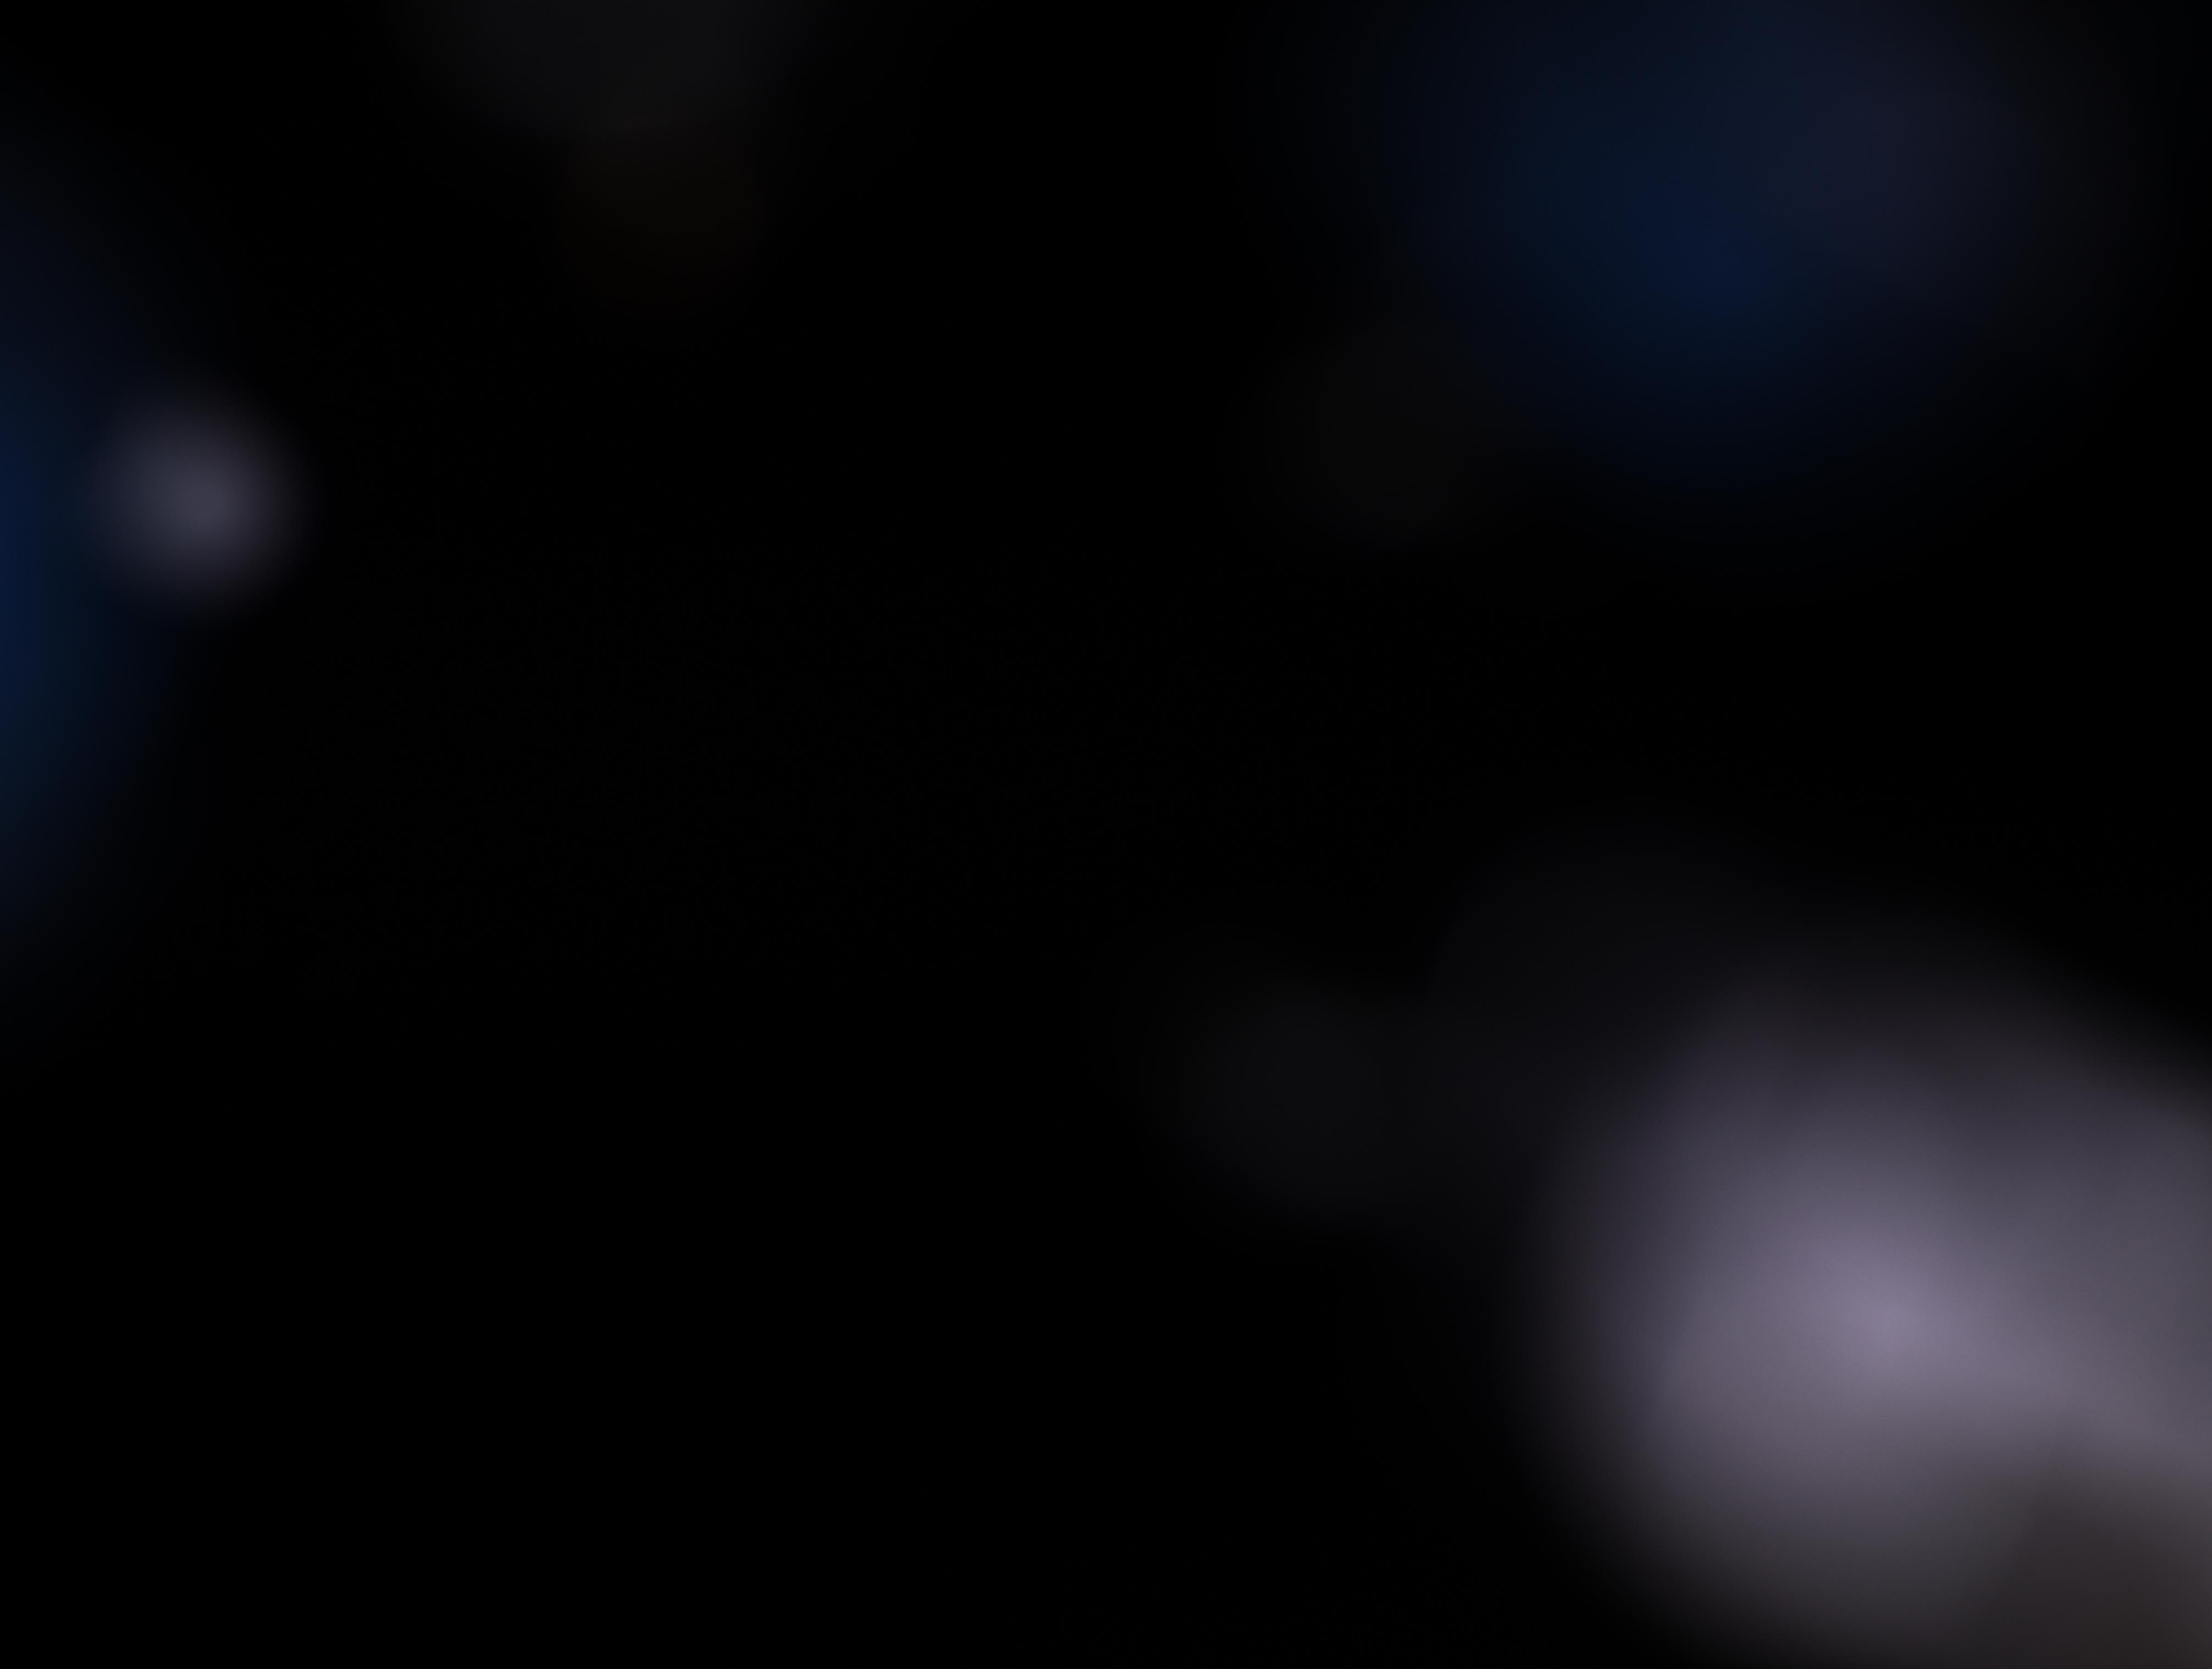

In [31]:
def photodoc(label: str | None) -> pathlib.Path:
    ImageMVR.label = label
    ImageMVR.start()
    ImageMVR.finalize()
    NewScaleCoordinateRecorder.start()
    return ImageMVR.data_files[-1]
    
IPython.display.Image(photodoc('pre_experiment_surface_image'))

# **Insert probes**

## **Photodoc before advancing probes**

Turn on light and focus on brain surface

In [30]:
IPython.display.Image(photodoc('pre_experiment_surface_image'))

19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "take_snapshot"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "take_snapshot"}'
19:54 | np_workflows.services.proxies | DEBUG | Finalizing ImageMVR
19:54 | np_workflows.services.proxies | DEBUG | Finalizing ImageMVR
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:54 | np_workflows.services.proxies | DEBUG | ImageMVR processing finished: ['Aux_20230127T195435_pre_experiment_surface_image.jpg']
19:54 | np_workflows.services.proxies | DEBUG | ImageMVR processing finished: ['Aux_20230

WindowsPath('//W10DTSM18280/c$/ProgramData/AIBS_MPE/mvr/data/Aux_20230127T195435_pre_experiment_surface_image.jpg')

ValueError: No image data found. Expecting filename, url, or data.

## **Photodoc after probes reach target depth**

Turn on light and focus on brain surface

In [ ]:
IPython.display.Image(photodoc('post_insertion_surface_image'))

## **Start settle timer**

In [ ]:
wait_sec = 10 * 60

time_0 = time.time()
time_remaining = lambda: datetime.timedelta(seconds = wait_sec - (time.time() - time_0))
while time_remaining().total_seconds() > 0:
    print(f'{time_remaining()}', end='\r', flush=True)
    time.sleep(.1)

# **Start recording**

In [ ]:
for service in (Sync, VideoMVR, OpenEphys):
    service.start()
    if isinstance(task, Verifiable):
        service.verify()

# **Start mapping**

In [ ]:

logger.info('Starting mapping')

mapping.start()

time.sleep(10)
mapping.verify()

while not ScriptCamstim.is_ready_to_start():
    time.sleep(10)

if isinstance(task, Finalizable):
    mapping.finalize()

logger.info('Mapping complete')

Give mousey a reward to test water delivery

# **Start task**

In [ ]:

logger.info('Starting task')

task.start()

time.sleep(10)
task.verify()

while not ScriptCamstim.is_ready_to_start():
    time.sleep(10)

if isinstance(task, Finalizable):
    task.finalize()

## **Stop recording**

In [ ]:
while not ScriptCamstim.is_ready_to_start():
    time.sleep(10)

for service in (_ for _ in (Sync, VideoMVR, OpenEphys) if isinstance(_, Stoppable)):
    service.stop()

for service in (_ for _ in (Sync, VideoMVR, OpenEphys) if isinstance(_, Finalizable)):
    service.finalize()

for service in (_ for _ in (Sync, VideoMVR, OpenEphys) if isinstance(_, Validatable)):
    service.validate()

## **Photodoc post-experiment, before removing probes**

Turn on light and focus on brain surface

In [28]:
IPython.display.Image(photodoc('post_stimulus_surface_image'))

19:47 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:47 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:47 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "take_snapshot"}'
19:47 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "take_snapshot"}'
19:47 | np_workflows.services.proxies | DEBUG | Finalizing ImageMVR
19:47 | np_workflows.services.proxies | DEBUG | Finalizing ImageMVR
19:47 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:47 | np_workflows.services.mvr | DEBUG | MVRConnector | Sending: b'{"mvr_request": "get_camera_status"}'
19:47 | np_workflows.services.proxies | DEBUG | ImageMVR processing finished: ['Aux_20230127T194704_post_stimulus_surface_image.jpg']
19:47 | np_workflows.services.proxies | DEBUG | ImageMVR processing finished: ['Aux_202301

WindowsPath('//W10DTSM18280/c$/ProgramData/AIBS_MPE/mvr/data/Aux_20230127T194704_post_stimulus_surface_image.jpg')

ValueError: No image data found. Expecting filename, url, or data.

## **Fully retract probes**

## **Final photodoc of brain surface without probes**

Turn on light and focus on brain surface

In [ ]:
IPython.display.Image(photodoc('post_experiment_surface_image'))

## **Finish up**

* raise cartridge
* add quickcast
* remove and water mouse

## **Copy files**

In [ ]:
import shutil

for service in services:
    for file in service.get_latest_data():
        shutil.copy2(file, session_folder)